In [2]:
import pymc3 as pm
import numpy as np
import seaborn as sns
import theano.tensor as T

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


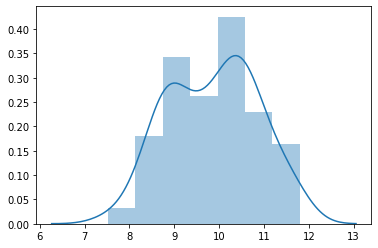

In [3]:
true_mean = 10
true_sigma = 1
N=100
obs_values = np.random.randn(N)*true_sigma+true_mean
sns.distplot(obs_values)

In [4]:
model = pm.Model()
with model:
    mean = pm.Normal('mean',15,5)
    sigma = pm.Lognormal('sigma',T.log(1),0.4)
    true_value = pm.Normal('true_value',mean,sigma,shape=N)
    obs_value = pm.Normal('obs_value',true_value,0.0001,observed=obs_values)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '28100' (I am process '27228')


In [5]:
with model:
    trace = pm.sample(500,tune=2000, init='adapt_diag', target_accept=0.999, cores=1, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [true_value, sigma, mean]


ValueError: Mass matrix contains zeros on the diagonal. 
The derivative of RV `mean`.ravel()[0] is zero.